In [12]:
import numpy as np
import pandas as pd

#### Task1: Understanding Naive Bayes and K-nearest neighbors
**1a.** Manually calculate the predictions using both the Naive Bayes model and the K-Nearest Neighbor (KNN) method for the test example assigned to you. (Refer to the “spam_worksheet” on Blackboard) (Bonus Question, 10/10 points. Please indicate whether you would like the bonus points applied to your Homework or to one in-class participation grade.)

**1b.** Write code (with AI assistant) to build a naive Bayes and KNN classifier. You can use the dataset “spam_dataset.csv” to test it out. For reference, you may review my shared file “Lab5_SharedInClass.ipynb” available on Blackboard. (10 points)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
data = pd.read_csv('spam_dataset.csv')

# Separate features and labels
X = data[['word1', 'word2', 'word3', 'word4']]
y = data['spam']  # assuming 'label' column exists

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Naive Bayes ---
nb = BernoulliNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

# --- KNN ---
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# --- Evaluation ---
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print("\nNaive Bayes Report:\n", classification_report(y_test, nb_pred))
print("\nKNN Report:\n", classification_report(y_test, knn_pred))

Naive Bayes Accuracy: 0.4666666666666667
KNN Accuracy: 0.4

Naive Bayes Report:
               precision    recall  f1-score   support

           0       0.45      0.71      0.56         7
           1       0.50      0.25      0.33         8

    accuracy                           0.47        15
   macro avg       0.48      0.48      0.44        15
weighted avg       0.48      0.47      0.44        15


KNN Report:
               precision    recall  f1-score   support

           0       0.42      0.71      0.53         7
           1       0.33      0.12      0.18         8

    accuracy                           0.40        15
   macro avg       0.38      0.42      0.35        15
weighted avg       0.37      0.40      0.34        15



#### Task2: Understanding ROC and AUC
**2a:** Let’s create a ROC together (Refer to ROC_dataset.csv)

1. Create a confusion matrix based on the threshold assigned to you
2. Calculate the True Positive Rate (TPR) and False Positive Rate (FPR) from the confusion
matrix
2. Plot the set points (FRP, TPR) on the ROC diagram (on a whiteboard or the
spreadsheet)

**2b.** Write code (with AI assistant) to fit the model using your favorite classifier (NB, KNN, or Decision tree); using the spam_dataset.csv, ask to output an ROC curve and AUC score.

(Hint: if you fit a decision tree, you might want to reduce max_depth)

In [14]:
!pip install openpyxl #installing package that allows me to convert excel to csv

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [15]:
#data = pd.read_excel('ROC_dataset.xlsx',engine='openpyxl')

#data.to_csv('ROC_dataset.xlsx',index=False)
data = pd.read_csv('ROC_dataset.xlsx')
print(data.head())

   ID  Prediction  True_Label  Unnamed: 3  student ID student Name  index  \
0   1       0.998           1         NaN         1.0    Christine    8.0   
1   2       0.998           1         NaN         2.0   Adam Abril   16.0   
2   3       0.998           1         NaN         3.0  thaddeus :)   24.0   
3   4       0.997           1         NaN         4.0       Shajan   32.0   
4   5       0.997           1         NaN         5.0       Serena   40.0   

   threshold       TPR       FPR  
0        NaN  0.125000  0.000000  
1      0.986  0.208333  0.012821  
2      0.979  0.305556  0.012821  
3      0.970       NaN       NaN  
4      0.997  0.513800  0.038400  


In [16]:
from sklearn.metrics import confusion_matrix

threshold = 0.5

# predicted labels based on threshold
data['Predicted_Label'] = (data['Prediction'] >= threshold).astype(int)

# confusion matrix
cm = confusion_matrix(data['True_Label'], data['Predicted_Label'])
TN, FP, FN, TP = cm.ravel()

print("Confusion matrix:\n", cm)
print(f"TP = {TP}, FP = {FP}, TN = {TN}, FN = {FN}")

Confusion matrix:
 [[67 11]
 [ 5 67]]
TP = 67, FP = 11, TN = 67, FN = 5


In [17]:
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

print(f"True Positive Rate (TPR): {TPR:.3f}")
print(f"False Positive Rate (FPR): {FPR:.3f}")

True Positive Rate (TPR): 0.931
False Positive Rate (FPR): 0.141


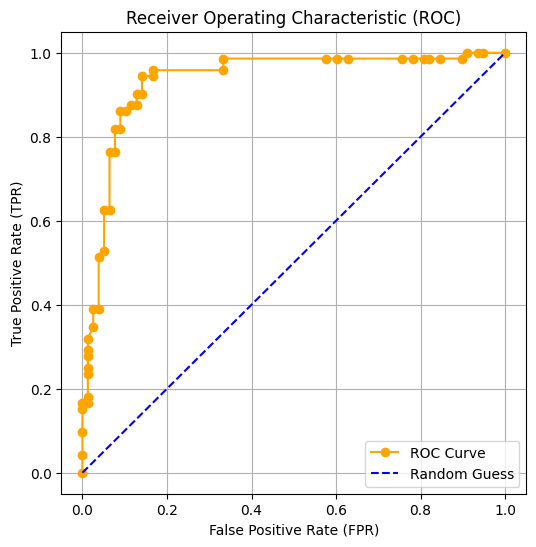

In [18]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(data['True_Label'], data['Prediction'])

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, marker='o', label='ROC Curve',color='orange')
plt.plot([0,1],[0,1],'--', color='blue', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()
plt.grid(True)
plt.show()

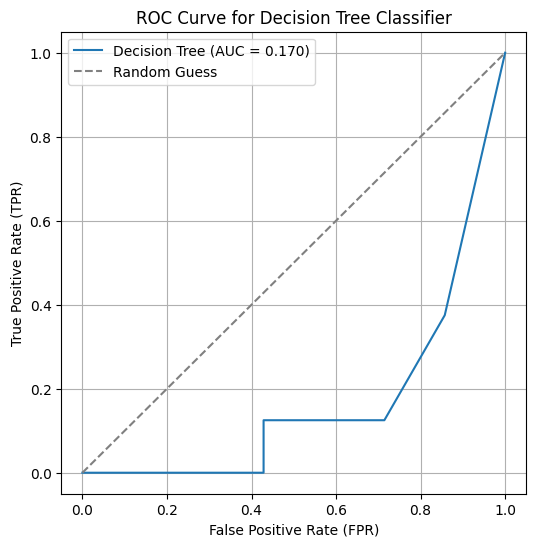

✅ AUC Score: 0.170


In [19]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# --- Load dataset ---
# (Assuming it’s your spam dataset with columns word1–word4 and 'spam' label)
data = pd.read_csv('spam_dataset.csv')

# --- Split features and labels ---
X = data[['word1', 'word2', 'word3', 'word4']]
y = data['spam']

# --- Split into training and testing sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# --- Fit Decision Tree model ---
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# --- Get predicted probabilities (for ROC curve) ---
y_probs = tree.predict_proba(X_test)[:, 1]   # probability of class 1 (spam)

# --- Compute ROC curve and AUC ---
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# --- Plot ROC curve ---
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], '--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend()
plt.grid(True)
plt.show()

print(f"✅ AUC Score: {roc_auc:.3f}")

#### Task 3: Understanding and Preventing Outfitting
- What is it?
- Why does this happen?
- How to prevent it?

**3a:** Write code to implement cross-validation and tuning a decision tree with max_depth parameter (with AI assistant), your output should look like this if you use the iris dataset as a sample dataset.

**Task 3 Responses**
- **What is it?**

Overfitting is an issue of implementation. It's an error on us (humans, programmers, data scientists) choosing said model to fit said problem except it doesn't effectively provide a solution or predicted outcome. An example could be using polynomial regression for a dataset that really needs linear regression because it doesn't have that many features to consider. And as a result, you get an 'oversolved' response that isn't really suiting the originally desired outcome. 
- **Why does this happen?**

I think it can happen for a number of reasons. This can be a result of not understanding the original desire that stakeholders provide us, which can lead to a misdirection on what to do. Or perhaps not choosing the right model overall from lack of knowledge or just overthinking. 
- **How to prevent it?**

Re-affirming the original problem at hand. Assessing how to approach the situation, cross reference with other collaborators. 

Columns: ['ID', 'Prediction', 'True_Label', 'Unnamed: 3', 'student ID', 'student Name', 'index', 'threshold', 'TPR', 'FPR']
✅ Best max_depth (lowest CV error): 1
✅ Minimum cross-validation error: 0.1333


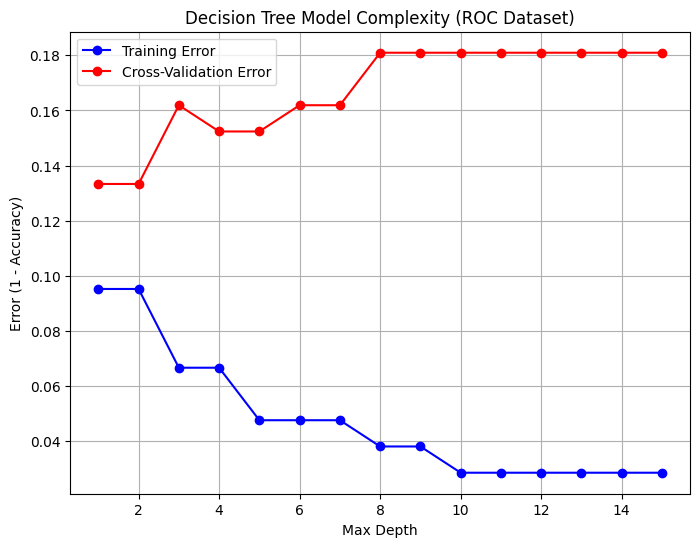

In [20]:
data = pd.read_csv('ROC_dataset.xlsx')

# --- Inspect columns ---
print("Columns:", data.columns.tolist())

# Assuming:
#   - 'Prediction' is a numerical column (your model score)
#   - 'True_Label' is the target (1 = spam, 0 = not spam)
# Drop other non-numeric or irrelevant columns
X = data[['Prediction']]   # feature(s)
y = data['True_Label']     # target

# --- Split dataset ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# --- Define range of max_depth values ---
max_depth_values = range(1, 16)
train_errors = []
cv_errors = []

# --- Loop over each possible max_depth ---
for depth in max_depth_values:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    
    # Fit model
    model.fit(X_train, y_train)
    
    # Calculate training error
    train_error = 1 - model.score(X_train, y_train)
    
    # Calculate cross-validation error (5-fold CV)
    cv_error = 1 - np.mean(cross_val_score(model, X_train, y_train, cv=5))
    
    # Append results
    train_errors.append(train_error)
    cv_errors.append(cv_error)

# --- Identify best depth ---
best_depth = max_depth_values[np.argmin(cv_errors)]
print(f"✅ Best max_depth (lowest CV error): {best_depth}")
print(f"✅ Minimum cross-validation error: {min(cv_errors):.4f}")

# --- Plot the Training and CV Errors ---
plt.figure(figsize=(8, 6))
plt.plot(max_depth_values, train_errors, label="Training Error", marker='o', color='blue')
plt.plot(max_depth_values, cv_errors, label="Cross-Validation Error", marker='o', color='red')
plt.xlabel("Max Depth")
plt.ylabel("Error (1 - Accuracy)")
plt.title("Decision Tree Model Complexity (ROC Dataset)")
plt.legend()
plt.grid(True)
plt.show()